<span style="color:#51a2d6; font-size:24px; font-weight:700"> Supervised vs. Unsupervised Learning


Most of the machine learning algorithms fall into one of two categories: supervised or unsupervised. 
The algorithms we have discussed so far in this course fall under supervised learning domain. 
For each observation measurement $x_i$, where $i = 1, . . . , n$ there is an associated response measurement $y_i$. 
The model is fit such that it relates the response to the independent variables, 
so that it can accurately predict the response for future observations. 
Classical statistical learning methods such as linear regression and logistic regression 
as well as modern approaches such as boosting, and support vector machines, 
operate in the supervised learning domain.



On the other hand, in unsupervised learning there are n observations $x_i$ 
where $i=1, . . . , n$ but no associated response $y_i$. 
It is not possible to fit a linear regression model or any other models we learned already, 
since there is no response variable to predict. 
The situation is referred to as unsupervised because we lack a response variable (knowledge) 
that can supervise the model's learning.

So, what kind of analysis can be done here? 
One can try to understand the relationships between the variables, or between the observations. 
Concept of cluster analysis, or clustering can be applied. 
The goal of cluster analysis is to ascertain, on the basis of $x_1$, . . . , $x_n$, 
whether the observations can form relatively distinct groups.



For example, 
in a market segmentation study we can try to cluster the customers on the basis of the variables measured, 
in order to identify distinct groups of potential customers. 
Identifying such groups can be of interest because it might be that the groups differ with 
respect to some property of interest, such as spending habits.

The image below shows a clustering data set involving three groups. 
Each group is shown using a different colored symbol. 
The left image shows three groups that are well-separated. 
In this kind of setting, a clustering approach should successfully identify the three groups. 
In the right image, there is some overlap among the groups, wherein the clustering task is more challenging.

<img src="../images/cluster1.JPG">



One cannot expect a clustering method to assign all of the overlapping points to their correct group. 
In the example shown above there are only two variables. 
So one can simply visually inspect the scatterplots of the observations in order to identify clusters. 
But in reality, data is high-dimensional, having many more than two variables. 
In those cases, it's not easy to plot the observations.

**Note:**
When performing clustering (unsupervised machine learning) on data such as shown on the right, there is no _correct answer_.
There are only some answers that are better or worse than others.

<span style="color:#ce7721; font-size:20px; font-weight:700"> K-Means Clustering</span>

Here the observations are partitioned into a pre-specified number of **K** distinct, non-overlapping clusters. 
Once the desired number of clusters K is specified, 
K-means algorithm will assign each observation to exactly one of the K clusters. 
The observations satisfy the following two conditions:

    i) Each observation belongs to at least one of the K clusters.
    ii) The clusters are non-overlapping. No observation belongs to more than one cluster

For instance, if the $i$th observation is in the $k$th cluster, then $i \in C_k$ (Note: $\in$ means "is an element of"). 
The idea behind K-means clustering is that a good clustering is one for which 
the within-cluster variation is as small as possible. 
The within-cluster variation for cluster $C_k$ is a measure W($C_k$) of the amount 
by which the observations within a cluster differ from each other. 
Hence, we want to solve the problem in the below equation:

$$\underset{C1,...,CK}{\mathrm{minimize}} \bigg\{\sum_{k=1}^{K} W(C_k) \bigg\} \quad \quad \quad \quad - (1)$$

Simply, it says that we want to partition the observations into _K_ clusters 
such that the total within-cluster variation, summed over all _K_ clusters, is as small as possible. 
In order to make it actionable we need to define the within-cluster variation. 
There are many possible ways to define this concept, 
but by far the most common choice involves squared Euclidean distance.
That is, we define


$$W(C_k) = \frac{1}{|{C_k}|} \sum_{i,\ {i'} \in C_k} \sum_{j=1}^P({x_{ij}}-{x_{i'j}})^2  \quad \quad \quad \quad - (2)$$


where |$C_k$| denotes the number of observations in the $k$th cluster. 
In other words, the within-cluster variation for the $k$th cluster is the sum of all of the 
pairwise squared Euclidean distances between the observations in the kth cluster, 
divided by the total number of observations in the kth cluster. 

Combining (1) and (2) gives the optimization problem that defines K-means clustering,

$$\underset{C1,...,CK}{\mathrm{minimize}} \bigg\{\sum_{k=1}^{K} \frac{1}{|{C_k}|} \sum_{i,\ {i'} \in C_k} \sum_{j=1}^P({x_{ij}}-{x_{i'j}})^2\bigg\}  \quad \quad \quad \quad - (3)$$

We need an algorithm to solve the above equation (3) that is, 
a method to partition the observations into K clusters such that the objective of (3) is minimized.
It could be a very difficult problem to solve, 
since there are almost $K^n$ ways to partition $n$ observations into $K$ clusters. 
This is a huge number unless $K$ and $n$ are tiny. 
Fortunately, a very simple algorithm exists to provide a local optimum to 
the K-means optimization problem, which is laid out below...

-----
<span style="color:#1576b2; font-size:16px; font-weight:700"> Algorithm : K-Means Clustering</span>

-------
1. Randomly assign a number, from 1 to K, to each of the observations. These serve as initial cluster assignments for the observations.

2. Iterate until the cluster assignments stop changing:
    
    a. For each of the K clusters, compute the cluster centroid. The $k$th cluster centroid is the vector of the p feature means for the observations in the kth cluster.  
    b. Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).
----

In Step 2(a) the cluster means for each feature are the constants that minimize the sum-of-squared deviations. 
In Step 2(b) observations are reallocated. 
This means that as the algorithm is run, 
the clustering obtained will continually improve until the result no longer changes. 
The objective of (3) will never increase. 
When the result no longer changes, a local optimum has been reached. 
K-means clustering derives its name from the fact that in Step 2 (a), 
the cluster centroids are computed as the mean of the observations assigned to each cluster. 
Because the K-means algorithm finds a local rather than a global optimum,
the results obtained will depend on the initial (random) cluster assignment of each observation in Step 1 of Algorithm 1. 
For this reason, it is important to run the algorithm multiple times from different random initial configurations. Then one selects the best solution, for which the objective (3) is smallest.

The figure below shows the progression of the algorithm on the toy example

<img src="../images/kmeans.JPG">

The top left image shows initial observations. 
Top center image shows step 1 of the algorithm where each observation is randomly assigned to a cluster. 
The top right image shows step 2(a) of an iteration where cluster centroids are computed. 
Centroids are shown as large colored disks. 
In beginning centroids are almost overlapping because the initial cluster assignments were chosen at random. 
The bottom left image shows is step 2(b) of the iteration, each observation is assigned to the nearest centroid. 
The bottom center image shows step 2(a) of next iteration, leading to new cluster centroids. 
The bottom right image shows the results obtained after ten iterations.

----
The `kmeans()` function performs K-means clustering in R. 
We begin with a simple simulated set of observations where there are two clusters in the data. 
The first 25 observations have a mean shift relative to the next 25 observations.

In [1]:
# Set the seed to reproduce the results
set.seed(4)

# Generate a random normal distribution of 100 values. Generate a matrix out of this normal distribution.
x = matrix(rnorm(50 * 2), ncol = 2)

# Add 3 to rows 1 to 25 in first column of the matrix
x[1:25, 1] = x[1:25, 1] + 3

# Subtract 4 from rows 1 to 25 in second column of the matrix
x[1:25, 2] = x[1:25, 2] - 4

We will perform K-means clustering with $K = 2$. 
nstart=20 implies multiple initial cluster assignments.

In [2]:
km.fit = kmeans(x, centers = 2, nstart = 20)

# The centers argument: either the number of clusters (e.g., k) or a set of initial (distinct) cluster 
# centers. If a number, a random set of (distinct) rows in x is chosen as the initial centers.

# The nstart argument: if centers (see above) is a number, nstart tells the number of random sets to be chosen

# To run the kmeans() function in R with multiple initial cluster assignments, we use the nstart argument. 
# If a value of nstart greater than one is used, then K-means clustering will be performed using multiple 
# random assignments (as described in Step 1 of the algorithm above), and the kmeans() function will report 
# only the best results.

The cluster assignments of the 50 observations are contained in km.fit$cluster...

In [3]:
km.fit$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

The K-means clustering perfectly separated the observations into two clusters 
even though we did not supply any group information to `kmeans()`. 
We can plot the data, with each observation colored according to its cluster assignment.

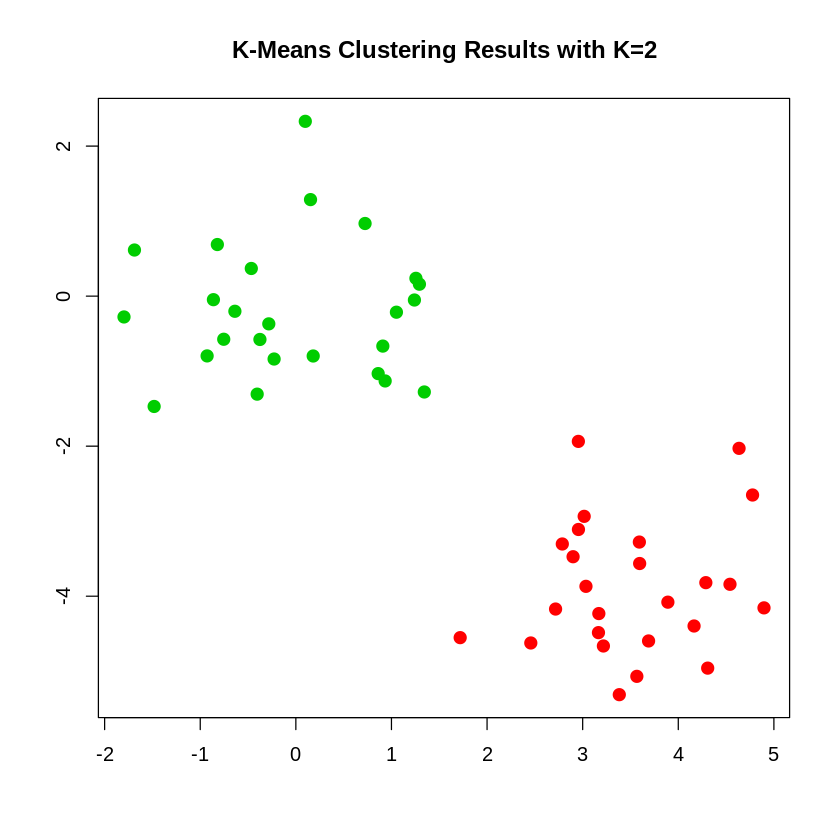

In [4]:
plot(x, col = (km.fit$cluster + 1) , main = "K-Means Clustering Results with K=2", xlab = "", ylab = "", 
     pch = 20, cex = 2)

Now, let's apply K-means clustering algorithm on $x$ and divide it into 3 clusters... 

In [5]:
set.seed (4)
km.fit = kmeans(x,3,nstart = 20)

# Clustering results
km.fit

K-means clustering with 3 clusters of sizes 25, 11, 14

Cluster means:
        [,1]        [,2]
1  3.4968274 -3.88442866
2  0.8968634  0.05541174
3 -0.7532448 -0.39907658

Clustering vector:
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 2 2 3 2 2 2 3 3 2 3 3 2
[39] 3 3 2 3 2 3 3 3 2 3 2 3

Within cluster sum of squares by cluster:
[1] 33.865779 14.391060  9.796515
 (between_SS / total_SS =  85.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

We can plot the data, with each observation colored according to its cluster assignment.

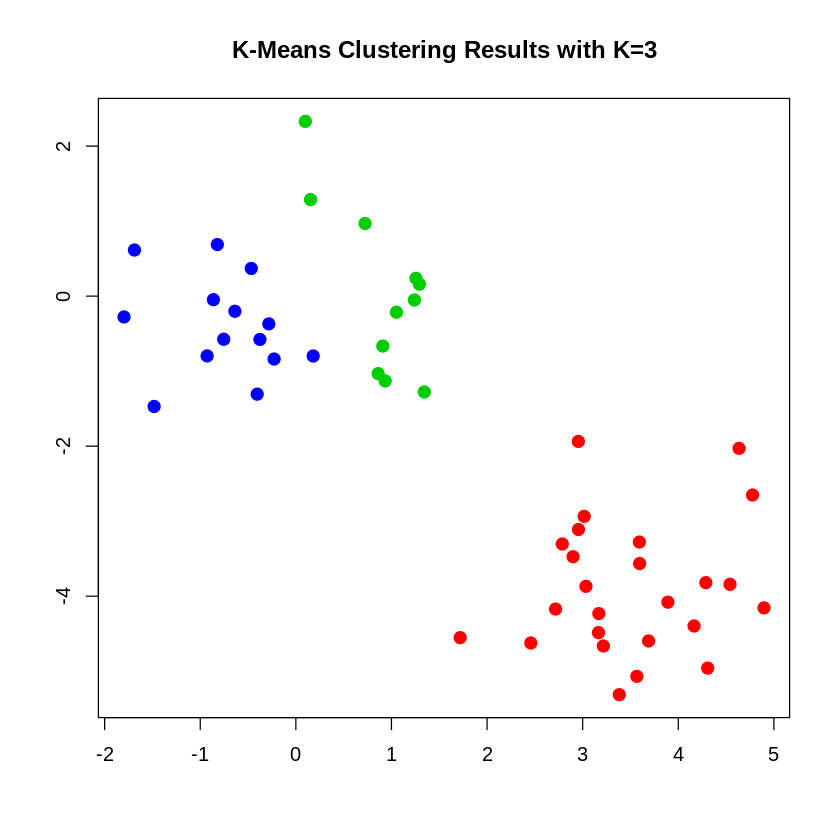

In [6]:
plot(x, col=(km.fit$cluster+1), main="K-Means Clustering Results with K=3", xlab ="", ylab="", pch =20, cex =2)

##### `kmeans()` with multiple initial cluster assignments explained...

Here we compare using nstart=1 to nstart=20

In [7]:
set.seed(3)
km.fit = kmeans(x,3,nstart = 1)
km.fit$tot.withinss

[1] 65.44307

In [8]:
set.seed(3)
km.fit = kmeans(x,3,nstart = 20)
km.fit$tot.withinss

[1] 58.05335

So, `km.fit$tot.withinss` is the total within-cluster sum of squares, 
which we seek to minimize by performing K-means clustering. 
The individual within-cluster sum-of-squares are contained in the vector `km.fit$withinss`. 
It is strongly recommended to always run K-means clustering with a large value of nstart, 
such as 20 or 50, since otherwise an undesirable local optimum may be obtained. 
In addition to using multiple initial cluster assignments, 
it is also **important to set a random seed using the `set.seed()` function**. 
This way, the **initial cluster assignments in Step 1 can be replicated**, and the K-means output will be fully reproducible.

# Save your notebook!